In [2]:
import pandas as pd
import numpy as np

from datetime import datetime
from sklearn.externals import joblib

import itertools
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, ShuffleSplit,  GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn import svm
from sklearn.svm import SVC

from sklearn.cross_validation import KFold
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report

%matplotlib inline
pd.set_option('display.max_columns', 400)

/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ic_df = pd.read_csv("ic_3mill.csv")
ic_df.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2254736        1    prior             4          4                  7   
1   1187899        1    train            11          4                  8   
2   2398795        1    prior             2          3                  7   
3   3108588        1    prior             8          1                 14   
4    431534        1    prior             5          4                 15   

   days_since_prior  order_id.1  product_id  add_to_cart_order  reordered  \
0              29.0     2254736       10258                  3          1   
1              14.0     1187899       39657                  5          1   
2              15.0     2398795       13032                  6          0   
3              14.0     3108588       46149                  5          0   
4              28.0      431534       10326                  5          0   

   product_id.1            product_name  aisle_id  department_id  \
0         10258              Pistachios       117             19   
1         39657  Milk Chocolate Almonds        45             19   
2         13032   Cinnamon Toast Crunch       121             14   
3         46149       Zero Calorie Cola        77              7   
4         10326     Organic Fuji Apples        24              4   

   department_id.1 department  aisle_id.1                   aisle  
0               19     snacks         117  nuts seeds dried fruit  
1               19     snacks          45         candy chocolate  
2               14  breakfast         121                  cereal  
3                7  beverages          77             soft drinks  
4                4    produce          24            fresh fruits

In [3]:
#changing the order of the columns
ic_df = ic_df[['order_id','user_id','department_id','department','aisle_id','aisle','product_id','product_name','eval_set','order_number','order_dow','order_hour_of_day','days_since_prior','add_to_cart_order','reordered','order_id.1','product_id.1','department_id.1','aisle_id.1']]
ic_df.head()

order_id  user_id  department_id department  aisle_id  \
0   2254736        1             19     snacks       117   
1   1187899        1             19     snacks        45   
2   2398795        1             14  breakfast       121   
3   3108588        1              7  beverages        77   
4    431534        1              4    produce        24   

                    aisle  product_id            product_name eval_set  \
0  nuts seeds dried fruit       10258              Pistachios    prior   
1         candy chocolate       39657  Milk Chocolate Almonds    train   
2                  cereal       13032   Cinnamon Toast Crunch    prior   
3             soft drinks       46149       Zero Calorie Cola    prior   
4            fresh fruits       10326     Organic Fuji Apples    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior  \
0             4          4                  7              29.0   
1            11          4                  8              14.0   
2             2          3                  7              15.0   
3             8          1                 14              14.0   
4             5          4                 15              28.0   

   add_to_cart_order  reordered  order_id.1  product_id.1  department_id.1  \
0                  3          1     2254736         10258               19   
1                  5          1     1187899         39657               19   
2                  6          0     2398795         13032               14   
3                  5          0     3108588         46149                7   
4                  5          0      431534         10326                4   

   aisle_id.1  
0         117  
1          45  
2         121  
3          77  
4          24

In [4]:
#removed duplicate columns
ic_df.head()

order_id  user_id  department_id department  aisle_id  \
0   2254736        1             19     snacks       117   
1   1187899        1             19     snacks        45   
2   2398795        1             14  breakfast       121   
3   3108588        1              7  beverages        77   
4    431534        1              4    produce        24   

                    aisle  product_id            product_name eval_set  \
0  nuts seeds dried fruit       10258              Pistachios    prior   
1         candy chocolate       39657  Milk Chocolate Almonds    train   
2                  cereal       13032   Cinnamon Toast Crunch    prior   
3             soft drinks       46149       Zero Calorie Cola    prior   
4            fresh fruits       10326     Organic Fuji Apples    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior  \
0             4          4                  7              29.0   
1            11          4                  8              14.0   
2             2          3                  7              15.0   
3             8          1                 14              14.0   
4             5          4                 15              28.0   

   add_to_cart_order  reordered  order_id.1  product_id.1  department_id.1  \
0                  3          1     2254736         10258               19   
1                  5          1     1187899         39657               19   
2                  6          0     2398795         13032               14   
3                  5          0     3108588         46149                7   
4                  5          0      431534         10326                4   

   aisle_id.1  
0         117  
1          45  
2         121  
3          77  
4          24

In [5]:
len(ic_df['department_id'].unique())

21

In [6]:
ic_df.shape

(3000000, 19)

In [7]:
#checking which column have null values
ic_df.isnull().any()

order_id             False
user_id              False
department_id        False
department           False
aisle_id             False
aisle                False
product_id           False
product_name         False
eval_set             False
order_number         False
order_dow            False
order_hour_of_day    False
days_since_prior      True
add_to_cart_order    False
reordered            False
order_id.1           False
product_id.1         False
department_id.1      False
aisle_id.1           False
dtype: bool

In [8]:
ic_df['days_since_prior'].isnull().sum().sum()

179205

In [9]:
ic_df[pd.isnull(ic_df['days_since_prior'])]

order_id  user_id  department_id       department  aisle_id  \
11        2539329        1              7        beverages        77   
17        2539329        1             19           snacks        23   
21        2539329        1             16       dairy eggs        91   
30        2539329        1             19           snacks        23   
34        2539329        1             17        household        54   
93        2168274        2             19           snacks        78   
113       2168274        2              4          produce        24   
131       2168274        2              4          produce       123   
151       2168274        2             19           snacks       107   
159       2168274        2             19           snacks        78   
198       2168274        2              4          produce        24   
220       2168274        2              4          produce        24   
232       2168274        2              7        beverages        98   
241       2168274        2             13           pantry        72   
249       2168274        2             19           snacks        23   
257       2168274        2             20             deli        67   
265       2168274        2             20             deli        96   
273       2168274        2             20             deli        96   
314       2717275        5              4          produce        83   
315       2717275        5              4          produce       123   
321       2717275        5              4          produce        16   
324       2717275        5              4          produce        83   
327       2717275        5              4          produce        24   
330       2717275        5              4          produce       123   
333       2717275        5             16       dairy eggs        84   
334       2717275        5             16       dairy eggs       120   
338       2717275        5              4          produce        83   
340       2717275        5             13           pantry        29   
341       2717275        5              6    international        66   
350       2565571        7             20             deli        96   
...           ...      ...            ...              ...       ...   
2999829   1195867    27908             13           pantry        17   
2999831   1195867    27908              9  dry goods pasta         4   
2999833   1195867    27908              4          produce        83   
2999835   1195867    27908             12     meat seafood       106   
2999837   1195867    27908             12     meat seafood       106   
2999839   1195867    27908             13           pantry        17   
2999841   1195867    27908             16       dairy eggs        36   
2999843   1195867    27908              4          produce        83   
2999845   1195867    27908             12     meat seafood       106   
2999847   1195867    27908             13           pantry       104   
2999849   1195867    27908             19           snacks       117   
2999851   1195867    27908              3           bakery        43   
2999853   1195867    27908              9  dry goods pasta         4   
2999855   1195867    27908              1           frozen        37   
2999857   1195867    27908              9  dry goods pasta        63   
2999859   1195867    27908              3           bakery        43   
2999861   1195867    27908             13           pantry        19   
2999863   1195867    27908             15     canned goods        59   
2999865   1195867    27908             16       dairy eggs        21   
2999867   1195867    27908             13           pantry        17   
2999869   1195867    27908             16       dairy eggs        36   
2999871   1195867    27908              4          produce        83   
2999873   1195867    27908              4          produce        24   
2999875   1195867    27908             16       d

In [10]:
ic_df['days_since_prior'].value_counts()

30.0    317035
7.0     315558
6.0     225665
5.0     192618
4.0     190429
3.0     172752
8.0     171466
2.0     136656
9.0     110075
14.0     97417
10.0     89308
1.0      83148
13.0     79343
11.0     74707
12.0     72975
15.0     62423
16.0     43528
21.0     43492
0.0      38871
20.0     36732
17.0     36096
18.0     32788
19.0     32356
22.0     30126
28.0     23362
23.0     21474
27.0     19445
24.0     18008
26.0     17851
25.0     17559
29.0     17532
Name: days_since_prior, dtype: int64

**Orders per user**

In [11]:
#orders per user
ic_df.groupby('user_id',as_index=False)['order_number'].max()

user_id  order_number
0            1            11
1            2            15
2            5             5
3            7            21
4            8             4
5            9             4
6           10             6
7           13            13
8           14            14
9           17            41
10          18             7
11          21            34
12          23             5
13          24            19
14          27            82
15          29            19
16          30             9
17          34             6
18          37            24
19          38            13
20          41             6
21          42            17
22          43            12
23          44             4
24          46            20
25          47             6
26          48            11
27          49             9
28          50            68
29          52            28
...        ...           ...
17745    27852            27
17746    27853            31
17747    27854            32
17748    27855             8
17749    27857             7
17750    27859             5
17751    27862            91
17752    27863            13
17753    27864             8
17754    27867            27
17755    27869             4
17756    27872            12
17757    27875            22
17758    27879            14
17759    27883             4
17760    27884            40
17761    27886            12
17762    27887             5
17763    27889            10
17764    27891            17
17765    27892             6
17766    27897            19
17767    27898             5
17768    27899            38
17769    27901            21
17770    27904             5
17771    27905             6
17772    27906             5
17773    27907           100
17774    27908            20

[17775 rows x 2 columns]

In [12]:
ic_df.groupby('user_id',as_index=False)['order_number'].max().describe()

user_id  order_number
count  17775.000000  17775.000000
mean   13913.642532     16.718819
std     8031.194271     16.883354
min        1.000000      4.000000
25%     6997.500000      6.000000
50%    13878.000000     10.000000
75%    20844.500000     20.000000
max    27908.000000    100.000000

In [20]:
#Understanding the distributions - mean, min, max, median for both the variables to define Power User
#orders_per_user_df.order_id.describe()

In [14]:
#Avg Items in Cart per Order Per User
avg_items_per_order_per_user_df = ic_df.groupby(['user_id','order_id'],as_index=False)['add_to_cart_order'].count()
avg_items_per_order_per_user_df

user_id  order_id  add_to_cart_order
0             1    431534                  8
1             1    473747                  5
2             1    550135                  5
3             1   1187899                 11
4             1   2254736                  5
5             1   2295261                  6
6             1   2398795                  6
7             1   2539329                  5
8             1   2550362                  9
9             1   3108588                  6
10            1   3367565                  4
11            2    738281                 13
12            2    788338                 16
13            2    839880                 16
14            2   1199898                 21
15            2   1402090                 15
16            2   1447487                  9
17            2   1492625                 31
18            2   1501582                  6
19            2   1673511                 13
20            2   1718559                 26
21            2   1901567                  5
22            2   2168274                 13
23            2   3186735                 19
24            2   3194192                 14
25            2   3268552                  9
26            5    157374                 12
27            5   1909121                  9
28            5   2196797                  9
29            5   2267326                  5
...         ...       ...                ...
297143    27907   3037700                 18
297144    27907   3042365                 20
297145    27907   3047775                 12
297146    27907   3061956                  8
297147    27907   3095697                  7
297148    27907   3098223                  7
297149    27907   3110822                 15
297150    27907   3138410                 15
297151    27907   3206560                 13
297152    27907   3255433                 10
297153    27907   3271634                  8
297154    27907   3311826                  6
297155    27907   3348887                  7
297156    27907   3349765                 13
297157    27908    191882                 10
297158    27908    224929                 14
297159    27908    479089                  6
297160    27908    482185                  5
297161    27908    484450                 11
297162    27908    538933                  7
297163    27908    735412                  5
297164    27908   1195867                 32
297165    27908   1370679                 26
297166    27908   1781112                 12
297167    27908   2342711                 31
297168    27908   2689243                 27
297169    27908   2709382                  3
297170    27908   3191637                  4
297171    27908   3244035                  4
297172    27908   3391336                  4

[297173 rows x 3 columns]

**items_per_order_per_user**

In [15]:
#6.36 items per order per user
items_per_order_per_user_df = avg_items_per_order_per_user_df.groupby(['user_id'],as_index=False)['add_to_cart_order'].mean()
items_per_order_per_user_df.loc[:, 'add_to_cart_order'] = np.ceil(items_per_order_per_user_df['add_to_cart_order'])
items_per_order_per_user_df

user_id  add_to_cart_order
0            1                7.0
1            2               16.0
2            5               10.0
3            7               11.0
4            8               17.0
5            9               25.0
6           10               25.0
7           13                7.0
8           14               16.0
9           17                8.0
10          18                8.0
11          21                7.0
12          23               11.0
13          24                3.0
14          27               10.0
15          29               13.0
16          30                2.0
17          34                7.0
18          37                9.0
19          38               17.0
20          41               14.0
21          42                9.0
22          43               15.0
23          44               11.0
24          46                9.0
25          47                6.0
26          48               12.0
27          49                6.0
28          50                7.0
29          52                7.0
...        ...                ...
17745    27852               10.0
17746    27853                8.0
17747    27854               25.0
17748    27855               12.0
17749    27857                4.0
17750    27859               18.0
17751    27862               10.0
17752    27863                4.0
17753    27864               13.0
17754    27867                9.0
17755    27869                4.0
17756    27872                6.0
17757    27875                2.0
17758    27879               11.0
17759    27883               18.0
17760    27884               14.0
17761    27886                7.0
17762    27887                2.0
17763    27889               19.0
17764    27891               10.0
17765    27892               10.0
17766    27897               11.0
17767    27898               12.0
17768    27899                7.0
17769    27901                8.0
17770    27904                8.0
17771    27905                3.0
17772    27906                6.0
17773    27907               11.0
17774    27908               13.0

[17775 rows x 2 columns]

In [18]:
items_per_order_per_user_df.add_to_cart_order.describe()

count    17775.00000
mean        10.42481
std          5.82477
min          1.00000
25%          6.00000
50%          9.00000
75%         13.00000
max         54.00000
Name: add_to_cart_order, dtype: float64

In [21]:
items_per_order_per_user_df[items_per_order_per_user_df['add_to_cart_order'] >10]

user_id  add_to_cart_order
1            2               16.0
3            7               11.0
4            8               17.0
5            9               25.0
6           10               25.0
8           14               16.0
12          23               11.0
15          29               13.0
19          38               17.0
20          41               14.0
22          43               15.0
23          44               11.0
26          48               12.0
30          53               12.0
31          55               13.0
32          56               12.0
33          59               11.0
35          63               13.0
36          64               14.0
41          71               20.0
46          79               13.0
47          80               11.0
52          86               16.0
55          89               13.0
57          91               16.0
59          95               18.0
62          99               12.0
63         102               11.0
67         106               15.0
69         109               13.0
...        ...                ...
17715    27807               22.0
17717    27810               13.0
17720    27816               12.0
17721    27817               13.0
17722    27818               22.0
17725    27821               22.0
17727    27827               11.0
17728    27829               13.0
17729    27830               13.0
17730    27831               11.0
17731    27832               23.0
17732    27833               14.0
17734    27836               13.0
17736    27839               19.0
17737    27840               11.0
17739    27843               11.0
17741    27847               12.0
17743    27849               12.0
17747    27854               25.0
17748    27855               12.0
17750    27859               18.0
17753    27864               13.0
17758    27879               11.0
17759    27883               18.0
17760    27884               14.0
17763    27889               19.0
17766    27897               11.0
17767    27898               12.0
17773    27907               11.0
17774    27908               13.0

[7477 rows x 2 columns]

In [22]:
#Understanding the distributions - mean, min, max, median for both the variables to define Power User
#lapply( avg_items_per_order_per_user_df['order_id'].describe(), round, digits=2)
avg_items_per_order_per_user_df['order_id'].describe()


count    2.971730e+05
mean     1.713497e+06
std      9.870507e+05
min      6.000000e+00
25%      8.614470e+05
50%      1.713308e+06
75%      2.566402e+06
max      3.421037e+06
Name: order_id, dtype: float64

In [23]:
#number of reordered items per order 
#(sum for all orders) / total number of orders (avg number of reordered items per order per user)

In [24]:
#num_reordered_items_per_order_df = ic_df.groupby(['user_id','order_id'],as_index=False)['reordered'].count()
reorder_sum_of_all_orders_df = ic_df.groupby(['user_id'],as_index=False)['reordered'].sum()
reorder_sum_of_all_orders_df

user_id  reordered
0            1         51
1            2        105
2            5         18
3            7        146
4            8         17
5            9         40
6           10         49
7           13         56
8           14         76
9           17        214
10          18         15
11          21        108
12          23         10
13          24         21
14          27        562
15          29        175
16          30          6
17          34          9
18          37         89
19          38        117
20          41         22
21          42         79
22          43         79
23          44          7
24          46        101
25          47          5
26          48         60
27          49          3
28          50        370
29          52        123
...        ...        ...
17745    27852        158
17746    27853        172
17747    27854        627
17748    27855         44
17749    27857         10
17750    27859         36
17751    27862        674
17752    27863          3
17753    27864         42
17754    27867        133
17755    27869          4
17756    27872         18
17757    27875         21
17758    27879         79
17759    27883         30
17760    27884        417
17761    27886         41
17762    27887          1
17763    27889         72
17764    27891         19
17765    27892          3
17766    27897        122
17767    27898         23
17768    27899        196
17769    27901         86
17770    27904         11
17771    27905          6
17772    27906          7
17773    27907        823
17774    27908         98

[17775 rows x 2 columns]

In [25]:
#total orders per user
total_orders_per_user_df = ic_df.groupby(['user_id']).order_id.nunique().reset_index()
#total_orders_per_user_df.to_csv("total_order_per_user.csv")
total_orders_per_user_df

user_id  order_id
0            1        11
1            2        15
2            5         5
3            7        21
4            8         4
5            9         4
6           10         6
7           13        13
8           14        14
9           17        41
10          18         7
11          21        34
12          23         5
13          24        19
14          27        82
15          29        19
16          30         9
17          34         6
18          37        24
19          38        13
20          41         6
21          42        17
22          43        12
23          44         4
24          46        20
25          47         6
26          48        11
27          49         9
28          50        68
29          52        28
...        ...       ...
17745    27852        27
17746    27853        31
17747    27854        32
17748    27855         8
17749    27857         7
17750    27859         5
17751    27862        91
17752    27863        13
17753    27864         8
17754    27867        27
17755    27869         4
17756    27872        12
17757    27875        22
17758    27879        14
17759    27883         4
17760    27884        40
17761    27886        12
17762    27887         5
17763    27889        10
17764    27891        17
17765    27892         6
17766    27897        19
17767    27898         5
17768    27899        38
17769    27901        21
17770    27904         5
17771    27905         6
17772    27906         5
17773    27907       100
17774    27908        16

[17775 rows x 2 columns]

In [26]:
#avg number of reordered items per order per user
avg_reordered_items_per_order_per_user =  np.ceil(reorder_sum_of_all_orders_df['reordered'] / total_orders_per_user_df['order_id']) 

avg_reordered_items_per_order_per_user = pd.DataFrame(avg_reordered_items_per_order_per_user)
avg_reordered_items_per_order_per_user


0
0       5.0
1       7.0
2       4.0
3       7.0
4       5.0
5      10.0
6       9.0
7       5.0
8       6.0
9       6.0
10      3.0
11      4.0
12      2.0
13      2.0
14      7.0
15     10.0
16      1.0
17      2.0
18      4.0
19      9.0
20      4.0
21      5.0
22      7.0
23      2.0
24      6.0
25      1.0
26      6.0
27      1.0
28      6.0
29      5.0
...     ...
17745   6.0
17746   6.0
17747  20.0
17748   6.0
17749   2.0
17750   8.0
17751   8.0
17752   1.0
17753   6.0
17754   5.0
17755   1.0
17756   2.0
17757   1.0
17758   6.0
17759   8.0
17760  11.0
17761   4.0
17762   1.0
17763   8.0
17764   2.0
17765   1.0
17766   7.0
17767   5.0
17768   6.0
17769   5.0
17770   3.0
17771   1.0
17772   2.0
17773   9.0
17774   7.0

[17775 rows x 1 columns]

In [27]:
#determining mean and max of 'days_since_prior_order' for a user  

mean_days_since_prior_df = ic_df.groupby(['user_id'],as_index=False)['days_since_prior'].mean()
mean_days_since_prior_df.loc[:, 'days_since_prior'] = np.ceil(mean_days_since_prior_df['days_since_prior'])

max_days_since_prior_df = ic_df.groupby(['user_id'],as_index=False)['days_since_prior'].max()
max_days_since_prior_df.loc[:, 'days_since_prior'] = np.ceil(max_days_since_prior_df['days_since_prior'])

max_days_since_prior_df

user_id  days_since_prior
0            1              30.0
1            2              30.0
2            5              19.0
3            7              30.0
4            8              30.0
5            9              30.0
6           10              30.0
7           13              13.0
8           14              30.0
9           17              30.0
10          18               9.0
11          21              30.0
12          23              30.0
13          24              30.0
14          27              20.0
15          29              17.0
16          30              30.0
17          34              30.0
18          37              30.0
19          38              30.0
20          41              30.0
21          42              30.0
22          43              26.0
23          44              30.0
24          46              30.0
25          47              16.0
26          48              29.0
27          49              30.0
28          50              14.0
29          52              30.0
...        ...               ...
17745    27852              30.0
17746    27853              30.0
17747    27854              23.0
17748    27855               8.0
17749    27857              30.0
17750    27859              30.0
17751    27862              14.0
17752    27863              30.0
17753    27864              30.0
17754    27867              21.0
17755    27869              30.0
17756    27872              30.0
17757    27875              30.0
17758    27879              30.0
17759    27883              30.0
17760    27884              20.0
17761    27886              30.0
17762    27887               9.0
17763    27889              30.0
17764    27891              30.0
17765    27892              30.0
17766    27897              30.0
17767    27898              30.0
17768    27899              18.0
17769    27901              30.0
17770    27904              30.0
17771    27905              30.0
17772    27906              30.0
17773    27907              13.0
17774    27908              30.0

[17775 rows x 2 columns]

In [28]:
#determining mode of 'order_dow' for a user 

mode_order_dow = ic_df.groupby(['user_id']).agg(lambda x:x.value_counts().index[0])
mode_order_dow 

order_id  department_id  department  aisle_id  \
user_id                                                  
1         1187899             19      snacks        77   
2         1492625             16  dairy eggs       120   
5          157374              4     produce       123   
7          121053              4     produce        31   
8          600894              4     produce        83   
9         1830137             16  dairy eggs       120   
10          68288              4     produce        83   
13        1906169             16  dairy eggs        83   
14        2109666             13      pantry        83   
17        1681401              7   beverages       115   
18        1020460              4     produce       123   
21          77791              7   beverages        86   
23        3402036             16  dairy eggs       120   
24        1103927              7   beverages        98   
27         994572              7   beverages       120   
29         620971             19      snacks        61   
30         375303              7   beverages       115   
34        1916863              4     produce        83   
37        2568429              4     produce        83   
38         894015             16  dairy eggs       115   
41        2838655              4     produce        83   
42         232622              1      frozen        38   
43        1864787              4     produce        24   
44        2699868              4     produce       123   
46        2681913              4     produce        24   
47        2201188             16  dairy eggs        24   
48         795269              4     produce        83   
49         500437              4     produce        83   
50        3175017              4     produce        83   
52        1498922             19     produce        32   
...           ...            ...         ...       ...   
27852      291410              7   beverages       115   
27853     3232794              4     produce        83   
27854      449589             16  dairy eggs        24   
27855     3008226             19      snacks       107   
27857      590163              7   beverages       115   
27859     1805381              4     produce        24   
27862     1574065             16  dairy eggs       120   
27863     2689883              4     produce        83   
27864     2937647              4     produce        83   
27867     2930744              4     produce        91   
27869      566016             16  dairy eggs        36   
27872     1472577              4     produce        83   
27875     1752405              7   beverages       115   
27879      357227              4     produce        24   
27883      927600              4     produce        83   
27884     2732996              4     produce        24   
27886     1455151              4     produce        83   
27887     2097197             14     produce        48   
27889     2911707              4     produce        24   
27891     1544521             19      snacks        17   
27892     2109710             19      snacks       120   
27897      291783              4     produce        83   
27898      963220             16     produce        83   
27899     1828058              7   beverages       115   
27901     2091601              4     produce        21   
27904     2334823             16  dairy eggs       120   
27905     2237723              7     produce       115   
27906     1184209             19      snacks        88   
27907     2419079              4     produce        24   
27908     1195867              4     produce        83   

                                 aisle  product_id  \
user_id                                              
1                          soft drinks         196   
2                               yogurt       32792   
5           packaged vegetables fruits       11777   
7                         refrigerated       40852   
8                     fresh ve

In [31]:
mode_order_dow1 = mode_order_dow.reset_index()
mode_order_dow2 = pd.DataFrame(mode_order_dow1['order_dow'])

mode_order_hour_of_day = pd.DataFrame(mode_order_dow1['order_hour_of_day'])
mode_order_hour_of_day

order_hour_of_day
0                      8
1                     11
2                     18
3                     18
4                      0
5                     12
6                     15
7                     21
8                      8
9                     12
10                    16
11                     9
12                    12
13                     8
14                    14
15                    11
16                    13
17                    14
18                    16
19                    10
20                    20
21                    13
22                    12
23                     9
24                    16
25                    22
26                    11
27                    15
28                    10
29                    10
...                  ...
17745                 10
17746                 11
17747                 15
17748                 10
17749                 15
17750                 15
17751                  9
17752                 11
17753                 10
17754                 19
17755                 12
17756                 12
17757                 13
17758                 17
17759                 10
17760                 21
17761                 15
17762                 15
17763                 13
17764                 20
17765                 12
17766                 14
17767                 17
17768                  9
17769                 14
17770                 22
17771                 19
17772                 14
17773                 22
17774                 15

[17775 rows x 1 columns]

In [32]:
ic_df.groupby('user_id').first().reset_index()


user_id  order_id  department_id       department  aisle_id  \
0            1   2254736             19           snacks       117   
1            2   3268552             20             deli        96   
2            5   2267326              4          produce        24   
3            7    121053             16       dairy eggs        91   
4            8    880375              4          produce        83   
5            9   1094988              3           bakery       112   
6           10   1224907              4          produce        16   
7           13   2288946             15     canned goods        59   
8           14   3206747              5          alcohol       124   
9           17   2760791              7        beverages       115   
10          18   2780889              4          produce       123   
11          21     77791             19           snacks       103   
12          23      8382             16       dairy eggs       120   
13          24    173172              7        beverages        98   
14          27    900590              7        beverages        26   
15          29   2064090             13           pantry        89   
16          30    375303             19           snacks        45   
17          34    698604             16       dairy eggs        84   
18          37   1354506              4          produce        83   
19          38   1308004              4          produce        83   
20          41   3083886             16       dairy eggs       120   
21          42   3034563              1           frozen        38   
22          43   2580647              4          produce        16   
23          44   2436259              3           bakery        43   
24          46   2009771             13           pantry        72   
25          47   2857489              1           frozen        52   
26          48   3067391              4          produce        83   
27          49    379097             13           pantry       105   
28          50   2757345              4          produce        83   
29          52   1520353             16       dairy eggs        21   
...        ...       ...            ...              ...       ...   
17745    27852   2322620             16       dairy eggs        84   
17746    27853   3104230              3           bakery       112   
17747    27854    934511             15     canned goods        69   
17748    27855   3386138              1           frozen       116   
17749    27857    213203              7        beverages       115   
17750    27859   1805381              4          produce       123   
17751    27862   3164427             19           snacks        78   
17752    27863   1684042              1           frozen       129   
17753    27864   1381212              4          produce        83   
17754    27867   3055814              7        beverages       115   
17755    27869   3043056             16       dairy eggs        21   
17756    27872   2862931              4          produce        83   
17757    27875   2393238              7        beverages       115   
17758    27879    357227             16       dairy eggs        36   
17759    27883   2075294             16       dairy eggs       120   
17760    27884     58056              4          produce        32   
17761    27886   1640211              4          produce        83   
17762    27887   1991418             14        breakfast        48   
17763    27889   3296721              3           bakery        93   
17764    27891    433139             16       dairy eggs        86   
17765    27892   2237437              9  dry goods pasta       131   
17766    27897    291783              4          produce        83   
17767    27898    155869              4          produce       123   
17768    27899   2259783             16       dairy eggs       120   
17769    27901   3239112              9  dry goods pasta       131   
17770    27904   

In [33]:
ic_train_orders_df = ic_df[ic_df['eval_set'] == 'train']
ic_train_orders_df

order_id  user_id  department_id     department  aisle_id  \
1         1187899        1             19         snacks        45   
7         1187899        1             19         snacks       117   
13        1187899        1             19         snacks        23   
19        1187899        1             17      household        54   
23        1187899        1              7      beverages        77   
25        1187899        1             16     dairy eggs        84   
27        1187899        1             16     dairy eggs        53   
29        1187899        1             16     dairy eggs       120   
44        1187899        1             14      breakfast       121   
47        1187899        1              7      beverages        77   
50        1187899        1             16     dairy eggs        21   
122       1492625        2              4        produce        24   
126       1492625        2              4        produce        24   
130       1492625        2              1         frozen        37   
134       1492625        2             19         snacks        23   
138       1492625        2              1         frozen        37   
142       1492625        2              1         frozen        38   
146       1492625        2             20           deli        96   
150       1492625        2              1         frozen        58   
156       1492625        2             20           deli        96   
162       1492625        2              4        produce        24   
168       1492625        2             15   canned goods        69   
174       1492625        2              1         frozen        38   
177       1492625        2             19         snacks         3   
179       1492625        2             15   canned goods        69   
180       1492625        2              4        produce        24   
181       1492625        2              1         frozen        38   
183       1492625        2              1         frozen        38   
185       1492625        2              1         frozen        38   
186       1492625        2             19         snacks        46   
...           ...      ...            ...            ...       ...   
2999031   2012979    27907              4        produce       123   
2999356   2012979    27907             16     dairy eggs        84   
2999358   2012979    27907             19         snacks        45   
2999360   2012979    27907             12   meat seafood        35   
2999799   1370679    27908             19         snacks        45   
2999801   1370679    27908              4        produce        24   
2999803   1370679    27908              4        produce        83   
2999805   1370679    27908              4        produce        24   
2999807   1370679    27908             20           deli        96   
2999809   1370679    27908             21        missing       100   
2999811   1370679    27908             16     dairy eggs        21   
2999813   1370679    27908              7      beverages       115   
2999815   1370679    27908             14      breakfast       121   
2999817   1370679    27908             13         pantry        17   
2999819   1370679    27908             16     dairy eggs        36   
2999821   1370679    27908              4        produce       123   
2999823   1370679    27908             13         pantry       105   
2999889   1370679    27908             16     dairy eggs        86   
2999901   1370679    27908             16     dairy eggs         2   
2999913   1370679    27908              4        produce        16   
2999924   1370679    27908              7      beverages        26   
2999932   1370679    27908              4        produce        83   
2999940   1370679    27908              4        produce        83   
2999948   1370679    27908              7      beverages       115   
2999956   1370679    27908             13         pantry       104   
2999964   1370679  

In [34]:
#ic_train_orders_df.groupby(['user_id'],as_index=False)['add_to_cart_order'].max()

ic_inter_df = ic_train_orders_df.groupby(['user_id'])[["order_id", "department_id", "department","aisle_id","aisle","product_id","product_name","eval_set","order_number","order_dow","order_hour_of_day","days_since_prior","add_to_cart_order","reordered"]].max().reset_index()

In [35]:
ic_inter_df.shape

(17775, 15)

In [36]:
ic_inter_df.head()

user_id  order_id  department_id department  aisle_id  \
0        1   1187899             19     snacks       121   
1        2   1492625             20     snacks       117   
2        5   2196797             17    produce       123   
3        7    525192             16    produce       122   
4        8    880375             20    produce       128   

                        aisle  product_id                  product_name  \
0                      yogurt       49235             Zero Calorie Cola   
1             soy lactosefree       48821             Vegetable Lasagna   
2  packaged vegetables fruits       48204  Tamari Gluten Free Soy Sauce   
3             soy lactosefree       47272    Vanilla Coffee Concentrate   
4        tortillas flat bread       48230                Vidalia Onions   

  eval_set  order_number  order_dow  order_hour_of_day  days_since_prior  \
0    train            11          4                  8              14.0   
1    train            15          1                 11              30.0   
2    train             5          0                 11               6.0   
3    train            21          2                 11               6.0   
4    train             4          1                 14              10.0   

   add_to_cart_order  reordered  
0                 11          1  
1                 31          1  
2                  9          1  
3                  9          1  
4                 18          1

In [37]:
#concat avg_orders_per_user to the main dataframe ic_inter_df

ic_inter_df1 = pd.concat([ic_inter_df, total_orders_per_user_df['order_id']], axis=1)
ic_inter_df1

user_id  order_id  department_id     department  aisle_id  \
0            1   1187899             19         snacks       121   
1            2   1492625             20         snacks       117   
2            5   2196797             17        produce       123   
3            7    525192             16        produce       122   
4            8    880375             20        produce       128   
5            9   1094988             20         snacks       121   
6           10   1822501             13         pantry       129   
7           13   1827621             16  personal care       128   
8           14   2316178             13        produce       124   
9           17   2180313             17        produce        86   
10          18   2461523             16        produce       123   
11          21   1854765             19         snacks       117   
12          23   3402036             17        produce       123   
13          24    965160              7      beverages        98   
14          27   2614670             16        produce       123   
15          29   3110252             20         snacks       115   
16          30     62370              7      beverages       115   
17          34    698604             16        produce       120   
18          37   1524161             19         snacks       123   
19          38   3173750             19         snacks       131   
20          41   2032076             20         snacks       123   
21          42   2803975             19         snacks       123   
22          43   1864787             20        produce       129   
23          44   2436259             13        produce       127   
24          46   1947848             19         snacks       131   
25          47   2906490             15  personal care       132   
26          48   2924697             19         snacks       131   
27          49    519514             19         snacks       128   
28          50   1750084             16        produce       123   
29          52   1647290             19         snacks       123   
...        ...       ...            ...            ...       ...   
17745    27852   1664122             13        produce       115   
17746    27853   2905210             16        produce       112   
17747    27854   2238093             19         snacks       126   
17748    27855   2025034             19         snacks       116   
17749    27857   1581992              7      beverages       115   
17750    27859   2415974             21        produce       123   
17751    27862   1574065             19         snacks       120   
17752    27863   1837881             15        produce        99   
17753    27864   2040262             19         snacks       123   
17754    27867    231218             19         snacks       115   
17755    27869    566016             19         snacks        36   
17756    27872   2862931             16        produce       123   
17757    27875    620034              7      beverages       115   
17758    27879   3255533             21         snacks       112   
17759    27883    927600             20         snacks       123   
17760    27884     25797             19         snacks       114   
17761    27886    698799             15        produce       106   
17762    27887   1248445             14        produce        83   
17763    27889   2911707             20         snacks       128   
17764    27891   1544521             19         snacks       121   
17765    27892   2237437             19         snacks       131   
17766    27897   1251934             16        produce       128   
17767    27898    155869             20        produce       123   
17768    27899    596415             19         snacks       120   
17769    27901    694960             16        produce       123   
17770    27904    429989             20         snacks       120   
17771    27905   2948708              7      beverages       11

In [38]:
#concat items_per_order_per_user_df to the dataframe - ic_inter_df1

ic_inter_df2 = pd.concat([ic_inter_df1, items_per_order_per_user_df['add_to_cart_order']], axis=1)
ic_inter_df2

user_id  order_id  department_id     department  aisle_id  \
0            1   1187899             19         snacks       121   
1            2   1492625             20         snacks       117   
2            5   2196797             17        produce       123   
3            7    525192             16        produce       122   
4            8    880375             20        produce       128   
5            9   1094988             20         snacks       121   
6           10   1822501             13         pantry       129   
7           13   1827621             16  personal care       128   
8           14   2316178             13        produce       124   
9           17   2180313             17        produce        86   
10          18   2461523             16        produce       123   
11          21   1854765             19         snacks       117   
12          23   3402036             17        produce       123   
13          24    965160              7      beverages        98   
14          27   2614670             16        produce       123   
15          29   3110252             20         snacks       115   
16          30     62370              7      beverages       115   
17          34    698604             16        produce       120   
18          37   1524161             19         snacks       123   
19          38   3173750             19         snacks       131   
20          41   2032076             20         snacks       123   
21          42   2803975             19         snacks       123   
22          43   1864787             20        produce       129   
23          44   2436259             13        produce       127   
24          46   1947848             19         snacks       131   
25          47   2906490             15  personal care       132   
26          48   2924697             19         snacks       131   
27          49    519514             19         snacks       128   
28          50   1750084             16        produce       123   
29          52   1647290             19         snacks       123   
...        ...       ...            ...            ...       ...   
17745    27852   1664122             13        produce       115   
17746    27853   2905210             16        produce       112   
17747    27854   2238093             19         snacks       126   
17748    27855   2025034             19         snacks       116   
17749    27857   1581992              7      beverages       115   
17750    27859   2415974             21        produce       123   
17751    27862   1574065             19         snacks       120   
17752    27863   1837881             15        produce        99   
17753    27864   2040262             19         snacks       123   
17754    27867    231218             19         snacks       115   
17755    27869    566016             19         snacks        36   
17756    27872   2862931             16        produce       123   
17757    27875    620034              7      beverages       115   
17758    27879   3255533             21         snacks       112   
17759    27883    927600             20         snacks       123   
17760    27884     25797             19         snacks       114   
17761    27886    698799             15        produce       106   
17762    27887   1248445             14        produce        83   
17763    27889   2911707             20         snacks       128   
17764    27891   1544521             19         snacks       121   
17765    27892   2237437             19         snacks       131   
17766    27897   1251934             16        produce       128   
17767    27898    155869             20        produce       123   
17768    27899    596415             19         snacks       120   
17769    27901    694960             16        produce       123   
17770    27904    429989             20         snacks       120   
17771    27905   2948708              7      beverages       11

In [39]:
#concat avg_reordered_items_per_order_per_user to the dataframe - ic_inter_df2

ic_inter_df3 = pd.concat([ic_inter_df2, avg_reordered_items_per_order_per_user], axis=1)
ic_inter_df3

user_id  order_id  department_id     department  aisle_id  \
0            1   1187899             19         snacks       121   
1            2   1492625             20         snacks       117   
2            5   2196797             17        produce       123   
3            7    525192             16        produce       122   
4            8    880375             20        produce       128   
5            9   1094988             20         snacks       121   
6           10   1822501             13         pantry       129   
7           13   1827621             16  personal care       128   
8           14   2316178             13        produce       124   
9           17   2180313             17        produce        86   
10          18   2461523             16        produce       123   
11          21   1854765             19         snacks       117   
12          23   3402036             17        produce       123   
13          24    965160              7      beverages        98   
14          27   2614670             16        produce       123   
15          29   3110252             20         snacks       115   
16          30     62370              7      beverages       115   
17          34    698604             16        produce       120   
18          37   1524161             19         snacks       123   
19          38   3173750             19         snacks       131   
20          41   2032076             20         snacks       123   
21          42   2803975             19         snacks       123   
22          43   1864787             20        produce       129   
23          44   2436259             13        produce       127   
24          46   1947848             19         snacks       131   
25          47   2906490             15  personal care       132   
26          48   2924697             19         snacks       131   
27          49    519514             19         snacks       128   
28          50   1750084             16        produce       123   
29          52   1647290             19         snacks       123   
...        ...       ...            ...            ...       ...   
17745    27852   1664122             13        produce       115   
17746    27853   2905210             16        produce       112   
17747    27854   2238093             19         snacks       126   
17748    27855   2025034             19         snacks       116   
17749    27857   1581992              7      beverages       115   
17750    27859   2415974             21        produce       123   
17751    27862   1574065             19         snacks       120   
17752    27863   1837881             15        produce        99   
17753    27864   2040262             19         snacks       123   
17754    27867    231218             19         snacks       115   
17755    27869    566016             19         snacks        36   
17756    27872   2862931             16        produce       123   
17757    27875    620034              7      beverages       115   
17758    27879   3255533             21         snacks       112   
17759    27883    927600             20         snacks       123   
17760    27884     25797             19         snacks       114   
17761    27886    698799             15        produce       106   
17762    27887   1248445             14        produce        83   
17763    27889   2911707             20         snacks       128   
17764    27891   1544521             19         snacks       121   
17765    27892   2237437             19         snacks       131   
17766    27897   1251934             16        produce       128   
17767    27898    155869             20        produce       123   
17768    27899    596415             19         snacks       120   
17769    27901    694960             16        produce       123   
17770    27904    429989             20         snacks       120   
17771    27905   2948708              7      beverages       11

In [40]:
#concat mean_days_since_prior_df to the dataframe - ic_inter_df3

ic_inter_df4 = pd.concat([ic_inter_df3, mean_days_since_prior_df], axis=1)
ic_inter_df4


user_id  order_id  department_id     department  aisle_id  \
0            1   1187899             19         snacks       121   
1            2   1492625             20         snacks       117   
2            5   2196797             17        produce       123   
3            7    525192             16        produce       122   
4            8    880375             20        produce       128   
5            9   1094988             20         snacks       121   
6           10   1822501             13         pantry       129   
7           13   1827621             16  personal care       128   
8           14   2316178             13        produce       124   
9           17   2180313             17        produce        86   
10          18   2461523             16        produce       123   
11          21   1854765             19         snacks       117   
12          23   3402036             17        produce       123   
13          24    965160              7      beverages        98   
14          27   2614670             16        produce       123   
15          29   3110252             20         snacks       115   
16          30     62370              7      beverages       115   
17          34    698604             16        produce       120   
18          37   1524161             19         snacks       123   
19          38   3173750             19         snacks       131   
20          41   2032076             20         snacks       123   
21          42   2803975             19         snacks       123   
22          43   1864787             20        produce       129   
23          44   2436259             13        produce       127   
24          46   1947848             19         snacks       131   
25          47   2906490             15  personal care       132   
26          48   2924697             19         snacks       131   
27          49    519514             19         snacks       128   
28          50   1750084             16        produce       123   
29          52   1647290             19         snacks       123   
...        ...       ...            ...            ...       ...   
17745    27852   1664122             13        produce       115   
17746    27853   2905210             16        produce       112   
17747    27854   2238093             19         snacks       126   
17748    27855   2025034             19         snacks       116   
17749    27857   1581992              7      beverages       115   
17750    27859   2415974             21        produce       123   
17751    27862   1574065             19         snacks       120   
17752    27863   1837881             15        produce        99   
17753    27864   2040262             19         snacks       123   
17754    27867    231218             19         snacks       115   
17755    27869    566016             19         snacks        36   
17756    27872   2862931             16        produce       123   
17757    27875    620034              7      beverages       115   
17758    27879   3255533             21         snacks       112   
17759    27883    927600             20         snacks       123   
17760    27884     25797             19         snacks       114   
17761    27886    698799             15        produce       106   
17762    27887   1248445             14        produce        83   
17763    27889   2911707             20         snacks       128   
17764    27891   1544521             19         snacks       121   
17765    27892   2237437             19         snacks       131   
17766    27897   1251934             16        produce       128   
17767    27898    155869             20        produce       123   
17768    27899    596415             19         snacks       120   
17769    27901    694960             16        produce       123   
17770    27904    429989             20         snacks       120   
17771    27905   2948708              7      beverages       11

In [41]:
#concat max_days_since_prior_df to the dataframe - ic_inter_df4

ic_inter_df5 = pd.concat([ic_inter_df4, max_days_since_prior_df], axis=1)
ic_inter_df5

user_id  order_id  department_id     department  aisle_id  \
0            1   1187899             19         snacks       121   
1            2   1492625             20         snacks       117   
2            5   2196797             17        produce       123   
3            7    525192             16        produce       122   
4            8    880375             20        produce       128   
5            9   1094988             20         snacks       121   
6           10   1822501             13         pantry       129   
7           13   1827621             16  personal care       128   
8           14   2316178             13        produce       124   
9           17   2180313             17        produce        86   
10          18   2461523             16        produce       123   
11          21   1854765             19         snacks       117   
12          23   3402036             17        produce       123   
13          24    965160              7      beverages        98   
14          27   2614670             16        produce       123   
15          29   3110252             20         snacks       115   
16          30     62370              7      beverages       115   
17          34    698604             16        produce       120   
18          37   1524161             19         snacks       123   
19          38   3173750             19         snacks       131   
20          41   2032076             20         snacks       123   
21          42   2803975             19         snacks       123   
22          43   1864787             20        produce       129   
23          44   2436259             13        produce       127   
24          46   1947848             19         snacks       131   
25          47   2906490             15  personal care       132   
26          48   2924697             19         snacks       131   
27          49    519514             19         snacks       128   
28          50   1750084             16        produce       123   
29          52   1647290             19         snacks       123   
...        ...       ...            ...            ...       ...   
17745    27852   1664122             13        produce       115   
17746    27853   2905210             16        produce       112   
17747    27854   2238093             19         snacks       126   
17748    27855   2025034             19         snacks       116   
17749    27857   1581992              7      beverages       115   
17750    27859   2415974             21        produce       123   
17751    27862   1574065             19         snacks       120   
17752    27863   1837881             15        produce        99   
17753    27864   2040262             19         snacks       123   
17754    27867    231218             19         snacks       115   
17755    27869    566016             19         snacks        36   
17756    27872   2862931             16        produce       123   
17757    27875    620034              7      beverages       115   
17758    27879   3255533             21         snacks       112   
17759    27883    927600             20         snacks       123   
17760    27884     25797             19         snacks       114   
17761    27886    698799             15        produce       106   
17762    27887   1248445             14        produce        83   
17763    27889   2911707             20         snacks       128   
17764    27891   1544521             19         snacks       121   
17765    27892   2237437             19         snacks       131   
17766    27897   1251934             16        produce       128   
17767    27898    155869             20        produce       123   
17768    27899    596415             19         snacks       120   
17769    27901    694960             16        produce       123   
17770    27904    429989             20         snacks       120   
17771    27905   2948708              7      beverages       11

In [42]:
#concat mode_order_dow2 to the dataframe - ic_inter_df5

ic_inter_df6 = pd.concat([ic_inter_df5, mode_order_dow2], axis=1)
ic_inter_df6


user_id  order_id  department_id     department  aisle_id  \
0            1   1187899             19         snacks       121   
1            2   1492625             20         snacks       117   
2            5   2196797             17        produce       123   
3            7    525192             16        produce       122   
4            8    880375             20        produce       128   
5            9   1094988             20         snacks       121   
6           10   1822501             13         pantry       129   
7           13   1827621             16  personal care       128   
8           14   2316178             13        produce       124   
9           17   2180313             17        produce        86   
10          18   2461523             16        produce       123   
11          21   1854765             19         snacks       117   
12          23   3402036             17        produce       123   
13          24    965160              7      beverages        98   
14          27   2614670             16        produce       123   
15          29   3110252             20         snacks       115   
16          30     62370              7      beverages       115   
17          34    698604             16        produce       120   
18          37   1524161             19         snacks       123   
19          38   3173750             19         snacks       131   
20          41   2032076             20         snacks       123   
21          42   2803975             19         snacks       123   
22          43   1864787             20        produce       129   
23          44   2436259             13        produce       127   
24          46   1947848             19         snacks       131   
25          47   2906490             15  personal care       132   
26          48   2924697             19         snacks       131   
27          49    519514             19         snacks       128   
28          50   1750084             16        produce       123   
29          52   1647290             19         snacks       123   
...        ...       ...            ...            ...       ...   
17745    27852   1664122             13        produce       115   
17746    27853   2905210             16        produce       112   
17747    27854   2238093             19         snacks       126   
17748    27855   2025034             19         snacks       116   
17749    27857   1581992              7      beverages       115   
17750    27859   2415974             21        produce       123   
17751    27862   1574065             19         snacks       120   
17752    27863   1837881             15        produce        99   
17753    27864   2040262             19         snacks       123   
17754    27867    231218             19         snacks       115   
17755    27869    566016             19         snacks        36   
17756    27872   2862931             16        produce       123   
17757    27875    620034              7      beverages       115   
17758    27879   3255533             21         snacks       112   
17759    27883    927600             20         snacks       123   
17760    27884     25797             19         snacks       114   
17761    27886    698799             15        produce       106   
17762    27887   1248445             14        produce        83   
17763    27889   2911707             20         snacks       128   
17764    27891   1544521             19         snacks       121   
17765    27892   2237437             19         snacks       131   
17766    27897   1251934             16        produce       128   
17767    27898    155869             20        produce       123   
17768    27899    596415             19         snacks       120   
17769    27901    694960             16        produce       123   
17770    27904    429989             20         snacks       120   
17771    27905   2948708              7      beverages       11

In [43]:
#concat mode_order_hour_of_day to the dataframe - ic_inter_df6

ic_df_final = pd.concat([ic_inter_df6, mode_order_hour_of_day], axis=1)
ic_df_final

user_id  order_id  department_id     department  aisle_id  \
0            1   1187899             19         snacks       121   
1            2   1492625             20         snacks       117   
2            5   2196797             17        produce       123   
3            7    525192             16        produce       122   
4            8    880375             20        produce       128   
5            9   1094988             20         snacks       121   
6           10   1822501             13         pantry       129   
7           13   1827621             16  personal care       128   
8           14   2316178             13        produce       124   
9           17   2180313             17        produce        86   
10          18   2461523             16        produce       123   
11          21   1854765             19         snacks       117   
12          23   3402036             17        produce       123   
13          24    965160              7      beverages        98   
14          27   2614670             16        produce       123   
15          29   3110252             20         snacks       115   
16          30     62370              7      beverages       115   
17          34    698604             16        produce       120   
18          37   1524161             19         snacks       123   
19          38   3173750             19         snacks       131   
20          41   2032076             20         snacks       123   
21          42   2803975             19         snacks       123   
22          43   1864787             20        produce       129   
23          44   2436259             13        produce       127   
24          46   1947848             19         snacks       131   
25          47   2906490             15  personal care       132   
26          48   2924697             19         snacks       131   
27          49    519514             19         snacks       128   
28          50   1750084             16        produce       123   
29          52   1647290             19         snacks       123   
...        ...       ...            ...            ...       ...   
17745    27852   1664122             13        produce       115   
17746    27853   2905210             16        produce       112   
17747    27854   2238093             19         snacks       126   
17748    27855   2025034             19         snacks       116   
17749    27857   1581992              7      beverages       115   
17750    27859   2415974             21        produce       123   
17751    27862   1574065             19         snacks       120   
17752    27863   1837881             15        produce        99   
17753    27864   2040262             19         snacks       123   
17754    27867    231218             19         snacks       115   
17755    27869    566016             19         snacks        36   
17756    27872   2862931             16        produce       123   
17757    27875    620034              7      beverages       115   
17758    27879   3255533             21         snacks       112   
17759    27883    927600             20         snacks       123   
17760    27884     25797             19         snacks       114   
17761    27886    698799             15        produce       106   
17762    27887   1248445             14        produce        83   
17763    27889   2911707             20         snacks       128   
17764    27891   1544521             19         snacks       121   
17765    27892   2237437             19         snacks       131   
17766    27897   1251934             16        produce       128   
17767    27898    155869             20        produce       123   
17768    27899    596415             19         snacks       120   
17769    27901    694960             16        produce       123   
17770    27904    429989             20         snacks       120   
17771    27905   2948708              7      beverages       11

In [72]:

ic_df_final.head()

order_id  department_id department  aisle_id                       aisle  \
0   1187899             19     snacks       121                      yogurt   
1   1492625             20     snacks       117             soy lactosefree   
2   2196797             17    produce       123  packaged vegetables fruits   
3    525192             16    produce       122             soy lactosefree   
4    880375             20    produce       128        tortillas flat bread   

   product_id                  product_name eval_set  order_number  order_dow  \
0       49235             Zero Calorie Cola    train            11          4   
1       48821             Vegetable Lasagna    train            15          1   
2       48204  Tamari Gluten Free Soy Sauce    train             5          0   
3       47272    Vanilla Coffee Concentrate    train            21          2   
4       48230                Vidalia Onions    train             4          1   

   order_hour_of_day  days_since_prior  add_to_cart_order  reordered  \
0                  8              14.0                 11          1   
1                 11              30.0                 31          1   
2                 11               6.0                  9          1   
3                 11               6.0                  9          1   
4                 14              10.0                 18          1   

   avg_orders  avg_items_per_order  avg_reordered_items_per_order  \
0          11                  7.0                            5.0   
1          15                 16.0                            7.0   
2           5                 10.0                            4.0   
3          21                 11.0                            7.0   
4           4                 17.0                            5.0   

   avg_days_since_prior  max_days_since_prior  mode_order_dow  \
0                  20.0                  30.0               4   
1                  19.0                  30.0               1   
2                  13.0                  19.0               0   
3                  14.0                  30.0               0   
4                  23.0                  30.0               1   

   mode_order_hour_of_day  
0                       8  
1                      11  
2                      18  
3                      18  
4                       0

In [64]:
ic_df_final.columns.values

array(['user_id', 'order_id', 'department_id', 'department', 'aisle_id',
       'aisle', 'product_id', 'product_name', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior',
       'add_to_cart_order', 'reordered', 'order_id', 'add_to_cart_order',
       0, 'user_id', 'days_since_prior', 'user_id', 'days_since_prior',
       'mode_order_hour_of_day', 'order_hour_of_day'], dtype=object)

In [66]:
#ic_df_final.drop(ic_df_final.columns[[18,20]], axis =1, inplace = True)
ic_df_final.columns.values

array(['order_id', 'department_id', 'department', 'aisle_id', 'aisle',
       'product_id', 'product_name', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior',
       'add_to_cart_order', 'reordered', 'order_id', 'add_to_cart_order',
       0, 'days_since_prior', 'days_since_prior', 'mode_order_hour_of_day',
       'order_hour_of_day'], dtype=object)

In [67]:
ic_df_final.shape

(17775, 21)

In [68]:
new_columns = ic_df_final.columns.values

new_columns[14] = 'avg_orders'
new_columns[15] = 'avg_items_per_order'
new_columns[16] = 'avg_reordered_items_per_order'
new_columns[17] = 'avg_days_since_prior'
new_columns[18] = 'max_days_since_prior'
new_columns[19] = 'mode_order_dow'
new_columns[20] = 'mode_order_hour_of_day'


ic_df_final.columns = new_columns
ic_df_final.head()

order_id  department_id department  aisle_id                       aisle  \
0   1187899             19     snacks       121                      yogurt   
1   1492625             20     snacks       117             soy lactosefree   
2   2196797             17    produce       123  packaged vegetables fruits   
3    525192             16    produce       122             soy lactosefree   
4    880375             20    produce       128        tortillas flat bread   

   product_id                  product_name eval_set  order_number  order_dow  \
0       49235             Zero Calorie Cola    train            11          4   
1       48821             Vegetable Lasagna    train            15          1   
2       48204  Tamari Gluten Free Soy Sauce    train             5          0   
3       47272    Vanilla Coffee Concentrate    train            21          2   
4       48230                Vidalia Onions    train             4          1   

   order_hour_of_day  days_since_prior  add_to_cart_order  reordered  \
0                  8              14.0                 11          1   
1                 11              30.0                 31          1   
2                 11               6.0                  9          1   
3                 11               6.0                  9          1   
4                 14              10.0                 18          1   

   avg_orders  avg_items_per_order  avg_reordered_items_per_order  \
0          11                  7.0                            5.0   
1          15                 16.0                            7.0   
2           5                 10.0                            4.0   
3          21                 11.0                            7.0   
4           4                 17.0                            5.0   

   avg_days_since_prior  max_days_since_prior  mode_order_dow  \
0                  20.0                  30.0               4   
1                  19.0                  30.0               1   
2                  13.0                  19.0               0   
3                  14.0                  30.0               0   
4                  23.0                  30.0               1   

   mode_order_hour_of_day  
0                       8  
1                      11  
2                      18  
3                      18  
4                       0

In [69]:
 ic_df_final.columns.values

array(['order_id', 'department_id', 'department', 'aisle_id', 'aisle',
       'product_id', 'product_name', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior',
       'add_to_cart_order', 'reordered', 'avg_orders',
       'avg_items_per_order', 'avg_reordered_items_per_order',
       'avg_days_since_prior', 'max_days_since_prior', 'mode_order_dow',
       'mode_order_hour_of_day'], dtype=object)

In [75]:
user_id_df = ic_inter_df6.iloc[:,0]
user_id_df

0            1
1            2
2            5
3            7
4            8
5            9
6           10
7           13
8           14
9           17
10          18
11          21
12          23
13          24
14          27
15          29
16          30
17          34
18          37
19          38
20          41
21          42
22          43
23          44
24          46
25          47
26          48
27          49
28          50
29          52
         ...  
17745    27852
17746    27853
17747    27854
17748    27855
17749    27857
17750    27859
17751    27862
17752    27863
17753    27864
17754    27867
17755    27869
17756    27872
17757    27875
17758    27879
17759    27883
17760    27884
17761    27886
17762    27887
17763    27889
17764    27891
17765    27892
17766    27897
17767    27898
17768    27899
17769    27901
17770    27904
17771    27905
17772    27906
17773    27907
17774    27908
Name: user_id, dtype: int64

In [76]:
ic_df_final1 = pd.concat([ic_df_final, user_id_df], axis=1)
ic_df_final1

order_id  department_id     department  aisle_id  \
0       1187899             19         snacks       121   
1       1492625             20         snacks       117   
2       2196797             17        produce       123   
3        525192             16        produce       122   
4        880375             20        produce       128   
5       1094988             20         snacks       121   
6       1822501             13         pantry       129   
7       1827621             16  personal care       128   
8       2316178             13        produce       124   
9       2180313             17        produce        86   
10      2461523             16        produce       123   
11      1854765             19         snacks       117   
12      3402036             17        produce       123   
13       965160              7      beverages        98   
14      2614670             16        produce       123   
15      3110252             20         snacks       115   
16        62370              7      beverages       115   
17       698604             16        produce       120   
18      1524161             19         snacks       123   
19      3173750             19         snacks       131   
20      2032076             20         snacks       123   
21      2803975             19         snacks       123   
22      1864787             20        produce       129   
23      2436259             13        produce       127   
24      1947848             19         snacks       131   
25      2906490             15  personal care       132   
26      2924697             19         snacks       131   
27       519514             19         snacks       128   
28      1750084             16        produce       123   
29      1647290             19         snacks       123   
...         ...            ...            ...       ...   
17745   1664122             13        produce       115   
17746   2905210             16        produce       112   
17747   2238093             19         snacks       126   
17748   2025034             19         snacks       116   
17749   1581992              7      beverages       115   
17750   2415974             21        produce       123   
17751   1574065             19         snacks       120   
17752   1837881             15        produce        99   
17753   2040262             19         snacks       123   
17754    231218             19         snacks       115   
17755    566016             19         snacks        36   
17756   2862931             16        produce       123   
17757    620034              7      beverages       115   
17758   3255533             21         snacks       112   
17759    927600             20         snacks       123   
17760     25797             19         snacks       114   
17761    698799             15        produce       106   
17762   1248445             14        produce        83   
17763   2911707             20         snacks       128   
17764   1544521             19         snacks       121   
17765   2237437             19         snacks       131   
17766   1251934             16        produce       128   
17767    155869             20        produce       123   
17768    596415             19         snacks       120   
17769    694960             16        produce       123   
17770    429989             20         snacks       120   
17771   2948708              7      beverages       115   
17772    554150             13        produce       123   
17773   2012979             19         snacks       123   
17774   1370679             21         snacks       123   

                               aisle  product_id  \
0                             yogurt       49235   
1                    soy lactosefree       48821   
2         packaged vegetables fruits       48204   
3                    soy lactosefree       47272   
4               tortillas flat bread       48230   
5                             yogurt

In [77]:
 ic_df_final1.columns.values

array(['order_id', 'department_id', 'department', 'aisle_id', 'aisle',
       'product_id', 'product_name', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior',
       'add_to_cart_order', 'reordered', 'avg_orders',
       'avg_items_per_order', 'avg_reordered_items_per_order',
       'avg_days_since_prior', 'max_days_since_prior', 'mode_order_dow',
       'mode_order_hour_of_day', 'user_id'], dtype=object)

In [78]:
#changing the order of the columns
instacart_df = ic_df_final1[['user_id','order_id', 'department_id', 'department', 'aisle_id', 'aisle',
       'product_id', 'product_name', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior',
       'add_to_cart_order', 'reordered', 'avg_orders',
       'avg_items_per_order', 'avg_reordered_items_per_order',
       'avg_days_since_prior', 'max_days_since_prior', 'mode_order_dow',
       'mode_order_hour_of_day']]
instacart_df.head()

user_id  order_id  department_id department  aisle_id  \
0        1   1187899             19     snacks       121   
1        2   1492625             20     snacks       117   
2        5   2196797             17    produce       123   
3        7    525192             16    produce       122   
4        8    880375             20    produce       128   

                        aisle  product_id                  product_name  \
0                      yogurt       49235             Zero Calorie Cola   
1             soy lactosefree       48821             Vegetable Lasagna   
2  packaged vegetables fruits       48204  Tamari Gluten Free Soy Sauce   
3             soy lactosefree       47272    Vanilla Coffee Concentrate   
4        tortillas flat bread       48230                Vidalia Onions   

  eval_set  order_number  order_dow  order_hour_of_day  days_since_prior  \
0    train            11          4                  8              14.0   
1    train            15          1                 11              30.0   
2    train             5          0                 11               6.0   
3    train            21          2                 11               6.0   
4    train             4          1                 14              10.0   

   add_to_cart_order  reordered  avg_orders  avg_items_per_order  \
0                 11          1          11                  7.0   
1                 31          1          15                 16.0   
2                  9          1           5                 10.0   
3                  9          1          21                 11.0   
4                 18          1           4                 17.0   

   avg_reordered_items_per_order  avg_days_since_prior  max_days_since_prior  \
0                            5.0                  20.0                  30.0   
1                            7.0                  19.0                  30.0   
2                            4.0                  13.0                  19.0   
3                            7.0                  14.0                  30.0   
4                            5.0                  23.0                  30.0   

   mode_order_dow  mode_order_hour_of_day  
0               4                       8  
1               1                      11  
2               0                      18  
3               0                      18  
4               1                       0

In [256]:
instacart_df.to_csv("instacart_snapshot.csv")

In [79]:
#Creating target variable power_user
#(orders per user > 15 and items per order per user > 10) -> count how many labels are 1

def f(row):
    if ((row['avg_orders'] > 10) & (row['avg_items_per_order'] > 9)):
        val = 1
    else:
        val = 0
    return val

instacart_df['power_user'] = instacart_df.apply(f, axis=1)


/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [117]:
len(instacart_df[instacart_df['power_user'] ==1])

4539

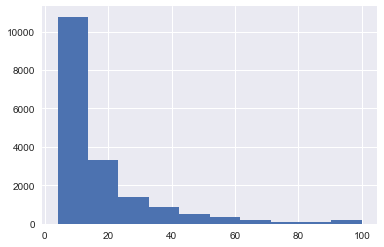

In [121]:
instacart_df['avg_orders'].hist()

**Functions**

In [222]:
def plotting_roc(fpr_val,tpr_val,roc_auc_val):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_val, tpr_val, 'b', label = 'AUC = %0.2f' % roc_auc_val)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    plt.savefig('roc1.png')
    
def roc_for_thresholds(y,scores):
     # Compute ROC curve and ROC area for each class

    # Use roc_curve to return the TPR and FPR rates at various thresholds
     fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)
        
     fpr_df = pd.DataFrame(fpr)
     tpr_df = pd.DataFrame(tpr)
     threshold_df = pd.DataFrame(thresholds) 
    
     tpr_fpr_df = pd.concat([fpr_df,tpr_df],axis =1)
     metrics_df = pd.concat([tpr_fpr_df,threshold_df],axis =1)
     #print(metrics_df)   
     
     print('FPR:' + str(fpr))
     print('TPR:' + str(tpr))
     print('Thresholds:' + str(thresholds))
     # Plot our ROC curve!
     plt.plot(fpr, tpr)
     plt.xlabel('FPR')
     plt.ylabel('TPR')
     
     return(metrics_df)
    
    
def plot_response(k,knn_accuracy):
    #print(len(k))
    plt.plot(k,knn_accuracy,lw=2)
    
    plt.legend(['knn accuracy'])
   
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.title('Accuracy response to k')
    plt.show()

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
def logistic_regression(ind_var_train,dep_var_train,ind_var_test,dep_var_test):
    logr = LogisticRegression()
    logr.fit(ind_var_train,dep_var_train)
    y_pred = logr.predict(ind_var_test)
    y_pred_prob = logr.predict_proba(ind_var_test)
    y_pred_prob = y_pred_prob[:,1]

    
    accuracy = accuracy_score(dep_var_test,y_pred)
    #f1_score = f1_score(dep_var_test, y_pred,average='weighted')
    recall =  recall_score(dep_var_test, y_pred,average='weighted')
    precision = precision_score(dep_var_test, y_pred,average='weighted')
    
    metrics_df = roc_for_thresholds(dep_var_test,y_pred_prob)
    fpr, tpr, threshold = roc_curve(dep_var_test,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Check trained model intercept
    print("Intercept :",logr.intercept_)

    # Check trained model coefficients
    print("Coefficients :",logr.coef_)
    
    joblib.dump(logr, 'instcart_model.pkl',protocol=2)
    
    plotting_roc(fpr,tpr,roc_auc)
    
    print("Accuracy :", accuracy)
    #print(f1_score)
    print("Recall :", recall)
    print("Precision :", precision)
    #print(fpr)
    #print(tpr)
    print("ROC_AUC :", roc_auc)
    
    # View summary of common classification metrics
    print(classification_report(dep_var_test, y_pred))
    
    
    # Compute confusion matrix
    class_names =[1,0] 
    cnf_matrix = confusion_matrix(dep_var_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix using matplotlib
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

    # Plot normalized confusion matrix
    #plt.figure()
    #plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
    #                  title='Normalized confusion matrix')

    plt.show()
    
    #Plot confusion matrix using Seaborn
    cm = confusion_matrix(dep_var_test,y_pred)

    df_cm = pd.DataFrame(cm, index = ['True (positive)', 'True (negative)'])
    df_cm.columns = ['Predicted (positive)', 'Predicted (negative)']

    sns.heatmap(df_cm, annot=True, fmt="d")

    return accuracy, recall, precision, metrics_df


def logistic_regression_cv(ind_var,dep_var,cv):
    logr_cv = LogisticRegression()
    accuracy = cross_val_score(logr_cv, ind_var, dep_var, cv=cv, scoring='r2')
    
    precision = cross_val_score(logr_cv, ind_var, dep_var, cv=cv, scoring='precision')
    recall = cross_val_score(logr_cv, ind_var, dep_var, cv=cv, scoring='recall')
    
    print("Accuracy :", accuracy.mean())
    print("Precision :", precision.mean())
    print("Recall :", recall.mean())
    
    return accuracy, recall, precision

def logistic_regression_holdout(ind_var_train,dep_var_train,ind_var_test,dep_var_test,cv):
    # Create the hyperparameter grid
    c_space = np.logspace(-5, 8, 15)
    param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

    # Instantiate the logistic regression classifier: logreg
    logr = LogisticRegression()

    # Instantiate the GridSearchCV object: logreg_cv
    logreg_cv = GridSearchCV(logr, param_grid, cv=cv)

    # Fit it to the training data
    logreg_cv.fit(ind_var_train, dep_var_train)

    # Print the optimal parameters and best score
    print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
    print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


def logistic_regression_poly(ind_var_train,dep_var_train,ind_var_test,dep_var_test,degree):
    #degree = 3
    # Generate the model type with make_pipeline
    # This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
    # a linear regression on the resulting features
    est = make_pipeline(PolynomialFeatures(degree), LogisticRegression())
    # Fit our model to the training data
    est.fit(ind_var_train, dep_var_train)
    #est.score(X_test,y_test)
    y_pred = est.predict(ind_var_test)
    y_pred_prob = est.predict_proba(ind_var_test)
    y_pred_prob = y_pred_prob[:,1]

    accuracy = accuracy_score(dep_var_test,y_pred)
    #f1_score = f1_score(dep_var_test, y_pred,average='weighted')
    recall =  recall_score(dep_var_test, y_pred,average='weighted')
    precision = precision_score(dep_var_test, y_pred,average='weighted')

    fpr, tpr, threshold = roc_curve(dep_var_test,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plotting_roc(fpr,tpr,roc_auc)
    
    print("Accuracy :", accuracy)
    print("Recall :", recall)
    print("Precision :", precision)
    print("ROC_AUC :", roc_auc)
    
    return accuracy, recall, precision
    

def gaussian_nb(ind_var_train,dep_var_train,ind_var_test,dep_var_test):
    
    gnb = GaussianNB()
    gnb.fit(ind_var_train,dep_var_train)
    y_pred = gnb.predict(ind_var_test)
    y_pred_prob = gnb.predict_proba(ind_var_test)
    y_pred_prob = y_pred_prob[:,1]

    accuracy = accuracy_score(dep_var_test,y_pred)
    #f1_score = f1_score(dep_var_test, y_pred,average='weighted')
    recall =  recall_score(dep_var_test, y_pred,average='weighted')
    precision = precision_score(dep_var_test, y_pred,average='weighted')

    fpr, tpr, threshold = roc_curve(dep_var_test,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plotting_roc(fpr,tpr,roc_auc)
    
    print("Accuracy :", accuracy)
    print("Recall :", recall)
    print("Precision :", precision)
    print("ROC_AUC :", roc_auc)
    
    return accuracy, recall, precision


def support_vector_machine(ind_var_train,dep_var_train,ind_var_test,dep_var_test):
    model_svm = svm.SVC(kernel='rbf',probability=True)
    model_svm.fit(ind_var_train,dep_var_train)
    y_pred = model_svm.predict(ind_var_test)
    y_pred_prob = model_svm.predict_proba(ind_var_test)
    y_pred_prob = y_pred_prob[:,1]

    accuracy = accuracy_score(dep_var_test,y_pred)
    #f1_score = f1_score(dep_var_test, y_pred,average='weighted')
    recall =  recall_score(dep_var_test, y_pred,average='weighted')
    precision = precision_score(dep_var_test, y_pred,average='weighted')

    fpr, tpr, threshold = roc_curve(dep_var_test,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plotting_roc(fpr,tpr,roc_auc)
    
    print("Accuracy :", accuracy)
    print("Recall :", recall)
    print("Precision :", precision)
    print("ROC_AUC :", roc_auc)
    
    return accuracy, recall, precision

def decision_tree(ind_var_train,dep_var_train,ind_var_test,dep_var_test):
    dt = DecisionTreeClassifier()
    dt.fit(ind_var_train,dep_var_train)
    y_pred = dt.predict(ind_var_test)
    
    y_pred_prob = dt.predict_proba(ind_var_test)
    y_pred_prob = y_pred_prob[:,1]

    accuracy = accuracy_score(dep_var_test,y_pred)
    #f1_score = f1_score(dep_var_test, y_pred,average='weighted')
    recall =  recall_score(dep_var_test, y_pred,average='weighted')
    precision = precision_score(dep_var_test, y_pred,average='weighted')

    fpr, tpr, threshold = roc_curve(dep_var_test,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plotting_roc(fpr,tpr,roc_auc)
    
    print("Accuracy :", accuracy)
    print("Recall :", recall)
    print("Precision :", precision)
    print("ROC_AUC :", roc_auc)
    
    return accuracy, recall, precision

def random_forest(ind_var_train,dep_var_train,ind_var_test,dep_var_test):
    rf = RandomForestClassifier()
    rf.fit(ind_var_train,dep_var_train)
    y_pred = rf.predict(ind_var_test)

    y_pred_prob = rf.predict_proba(ind_var_test)
    y_pred_prob = y_pred_prob[:,1]

    accuracy = accuracy_score(dep_var_test,y_pred)
    #f1_score = f1_score(dep_var_test, y_pred,average='weighted')
    recall =  recall_score(dep_var_test, y_pred,average='weighted')
    precision = precision_score(dep_var_test, y_pred,average='weighted')

    fpr, tpr, threshold = roc_curve(dep_var_test,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plotting_roc(fpr,tpr,roc_auc)
    
    print("Accuracy :", accuracy)
    print("Recall :", recall)
    print("Precision :", precision)
    print("ROC_AUC :", roc_auc)
    
    return accuracy, recall, precision

def gradient_boost(ind_var_train,dep_var_train,ind_var_test,dep_var_test):
    gb = GradientBoostingRegressor()
    gb.fit(ind_var_train,dep_var_train)
    y_pred = gb.predict(ind_var_test)

    y_pred_prob = gb.predict_proba(ind_var_test)
    y_pred_prob = y_pred_prob[:,1]

    accuracy = accuracy_score(dep_var_test,y_pred)
    #f1_score = f1_score(dep_var_test, y_pred,average='weighted')
    recall =  recall_score(dep_var_test, y_pred,average='weighted')
    precision = precision_score(dep_var_test, y_pred,average='weighted')

    fpr, tpr, threshold = roc_curve(dep_var_test,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plotting_roc(fpr,tpr,roc_auc)
    
    print("Accuracy :", accuracy)
    print("Recall :", recall)
    print("Precision :", precision)
    print("ROC_AUC :", roc_auc)


In [30]:
final_cols = ['avg_reordered_items_per_order', 'avg_days_since_prior', 'mode_order_dow', 'mode_order_hour_of_day']

**Creating a holdout set for finally checking the model performance** 

In [ ]:
# X = X.loc[:, final_cols]
#X_holdout = X_holdout.loc[:, final_cols]
# final_model = Lasso(alpha = final_alpha)
# final_fit = final_model.fit(X, y)

**Determining feature importance**

**1. Checking correlations**

In [83]:
instacart_df.corr()

user_id  order_id  department_id  aisle_id  \
user_id                        1.000000  0.006548      -0.000700  0.005662   
order_id                       0.006548  1.000000      -0.004042 -0.004374   
department_id                 -0.000700 -0.004042       1.000000  0.407056   
aisle_id                       0.005662 -0.004374       0.407056  1.000000   
product_id                     0.008539 -0.002870       0.388099  0.413635   
order_number                   0.009578 -0.005412       0.036509  0.039350   
order_dow                      0.004472 -0.004736      -0.032465 -0.032076   
order_hour_of_day              0.005801  0.005097       0.008883  0.010907   
days_since_prior               0.000590 -0.007089      -0.014335 -0.017361   
add_to_cart_order              0.007081  0.000935       0.442831  0.442007   
reordered                      0.004613  0.003661       0.169106  0.232681   
avg_orders                     0.009555 -0.005408       0.036496  0.039345   
avg_items_per_order            0.021017 -0.003563       0.371800  0.375642   
avg_reordered_items_per_order  0.019720 -0.002031       0.295898  0.297254   
avg_days_since_prior          -0.002596 -0.000870      -0.024449 -0.012657   
max_days_since_prior           0.004666 -0.003714      -0.024471 -0.012953   
mode_order_dow                -0.004565  0.001153      -0.038464 -0.043927   
mode_order_hour_of_day        -0.010691  0.006566       0.016963  0.029653   
power_user                     0.006449  0.000382       0.199343  0.198107   

                               product_id  order_number  order_dow  \
user_id                          0.008539      0.009578   0.004472   
order_id                        -0.002870     -0.005412  -0.004736   
department_id                    0.388099      0.036509  -0.032465   
aisle_id                         0.413635      0.039350  -0.032076   
product_id                       1.000000      0.034789  -0.022834   
order_number                     0.034789      1.000000   0.022396   
order_dow                       -0.022834      0.022396   1.000000   
order_hour_of_day                0.004430     -0.034684   0.001139   
days_since_prior                -0.012413     -0.384334  -0.025839   
add_to_cart_order                0.473535      0.039291  -0.031846   
reordered                        0.213399      0.116743  -0.010588   
avg_orders                       0.034782      0.999998   0.022376   
avg_items_per_order              0.395618      0.024103  -0.034064   
avg_reordered_items_per_order    0.302243      0.342704  -0.020856   
avg_days_since_prior            -0.029699     -0.573014  -0.027104   
max_days_since_prior            -0.028592     -0.227916  -0.031005   
mode_order_dow                  -0.047755     -0.029927   0.297846   
mode_order_hour_of_day           0.011170     -0.069845  -0.008431   
power_user                       0.208582      0.376842  -0.008850   

                               order_hour_of_day  days_since_prior  \
user_id                                 0.005801          0.000590   
order_id                                0.005097         -0.007089   
department_id                           0.008883         -0.014335   
aisle_id                                0.010907         -0.017361   
product_id                              0.004430         -0.012413   
order_number                           -0.034684         -0.384334   
order_dow                               0.001139         -0.025839   
order_hour_of_day                       1.000000         -0.003892   
days_since_prior                       -0.003892          1.000000   
add_to_cart_order                      -0.003595         -0.005497   
reordered                               0.003948         -0.094192   
avg_orders                             -0.034669         -0.384330   
avg_items_per_order                     0.009440         -0.037445   
avg_reordered_items_per_order          -0.018146         -0.179294   
avg_days_since_prior

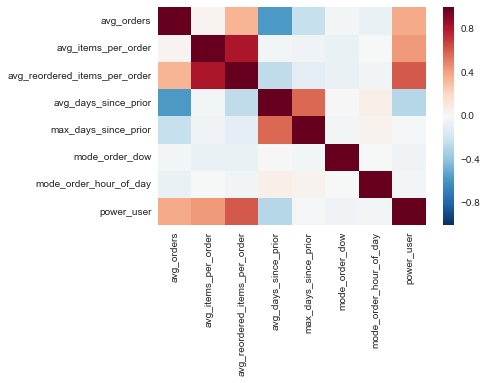

In [213]:
ic_corr = instacart_df.iloc[:,15:].corr()
sns.heatmap(ic_corr, 
            xticklabels=ic_corr.columns.values,
            yticklabels=ic_corr.columns.values)

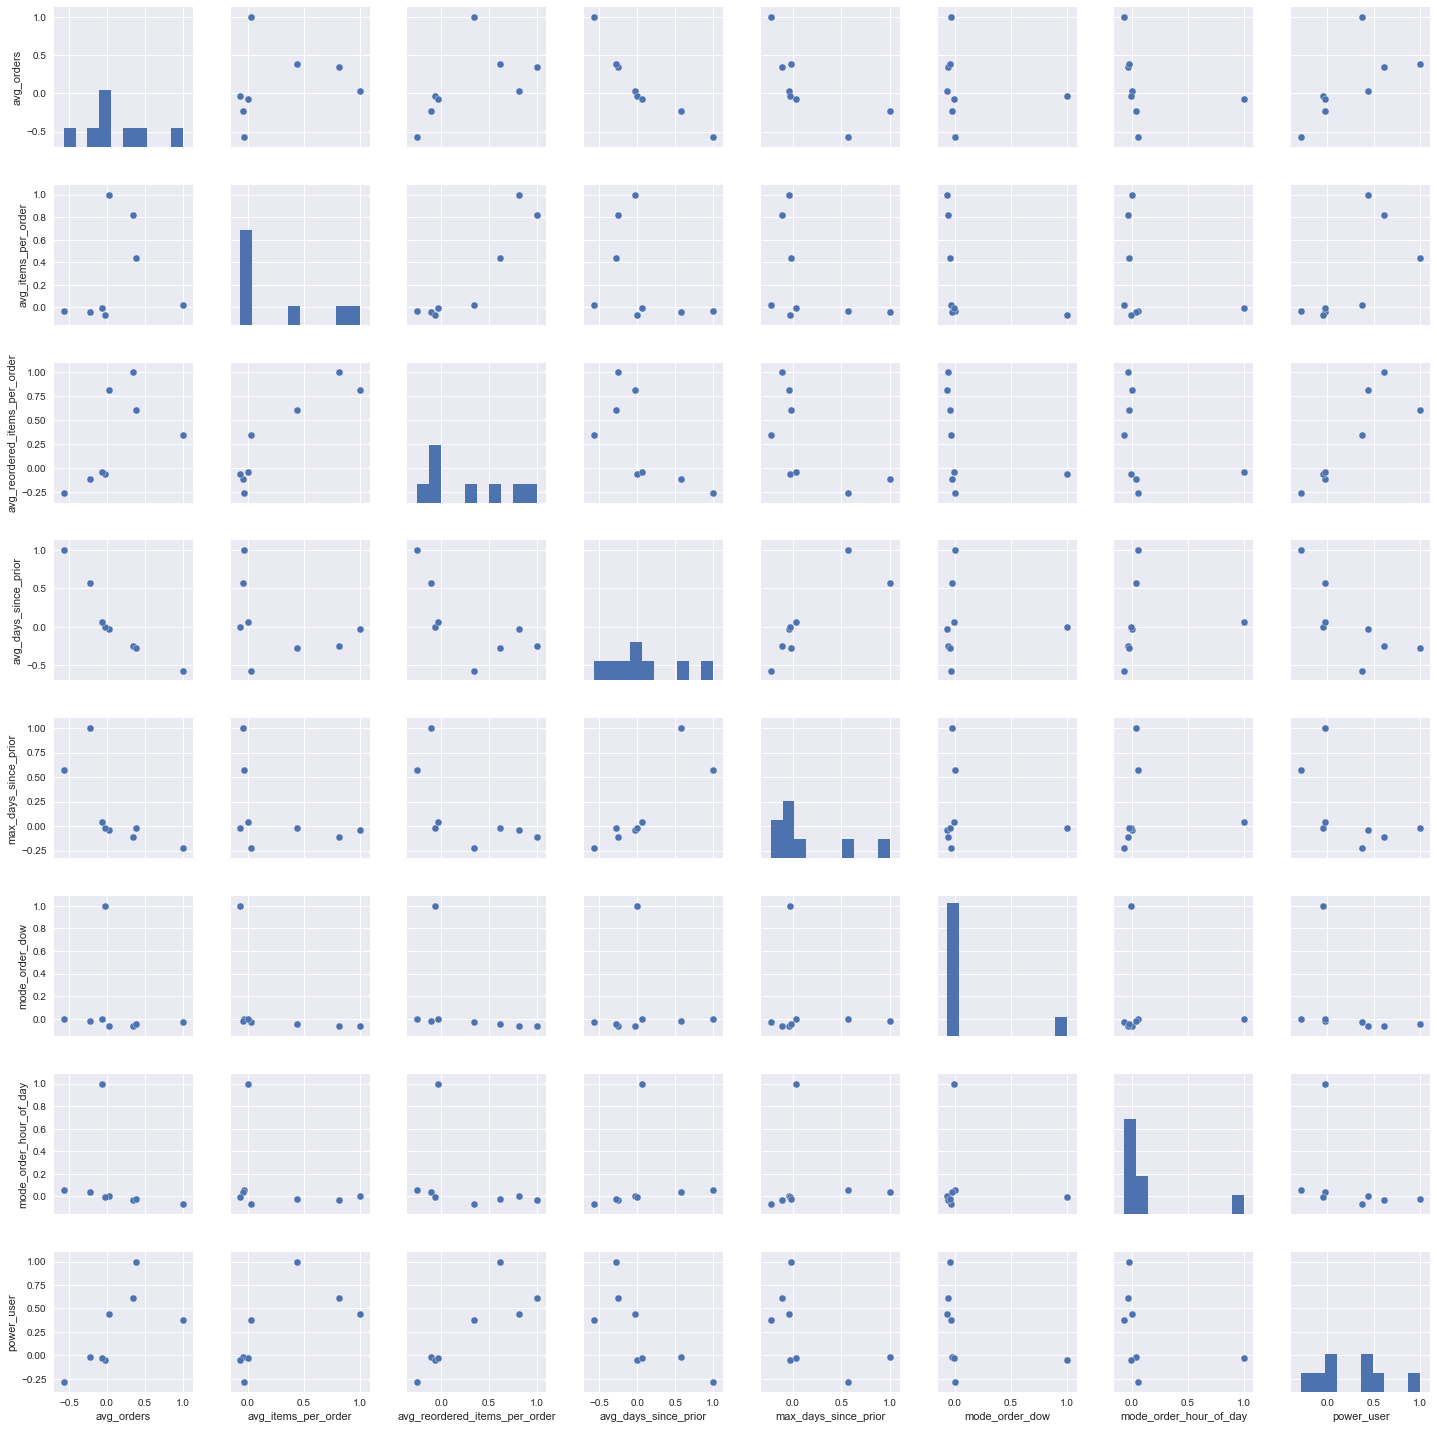

In [214]:
sns.pairplot(ic_corr)

**2. Using Random Forest**

In [84]:
X = instacart_df.ix[:,['avg_reordered_items_per_order', 'avg_days_since_prior', 'mode_order_dow', 'mode_order_hour_of_day']]

#X = ic_inter_df5.iloc[:,9:20]
y = instacart_df.iloc[:,-1]

X.head()

avg_reordered_items_per_order  avg_days_since_prior  mode_order_dow  \
0                            5.0                  20.0               4   
1                            7.0                  19.0               1   
2                            4.0                  13.0               0   
3                            7.0                  14.0               0   
4                            5.0                  23.0               1   

   mode_order_hour_of_day  
0                       8  
1                      11  
2                      18  
3                      18  
4                       0

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

imp = rf.feature_importances_

imp = pd.DataFrame(np.array(imp).T, columns = ['imp'], index = X.columns)
imp.sort_values('imp', ascending = False, inplace = True)
#imp.to_csv("important_features.csv")
print(imp)

                                    imp
avg_reordered_items_per_order  0.518378
avg_days_since_prior           0.206350
mode_order_hour_of_day         0.170200
mode_order_dow                 0.105072


**3. Using Multinomial Naive Bayes**

In [86]:

# Create the model
mnb = MultinomialNB()

# Fit the model to the training data
mnb.fit(X_train, y_train)
# Score the model against the test data
mnb.score(X_test, y_test)

#mnb.feature_log_prob_

0.83161447590474402

**Modeling**

**Logistic Regression with variables 'avg_reordered_items_per_order', 'avg_days_since_prior', 'mode_order_dow', 'mode_order_hour_of_day'**

FPR:[  0.00e+00   0.00e+00   2.51e-04 ...,   9.96e-01   9.96e-01   1.00e+00]
TPR:[  7.41e-04   8.15e-03   8.15e-03 ...,   1.00e+00   1.00e+00   1.00e+00]
Thresholds:[ 1.    1.    1.   ...,  0.01  0.01  0.  ]
Intercept : [-2.83]
Coefficients : [[ 0.52 -0.09 -0.02  0.  ]]


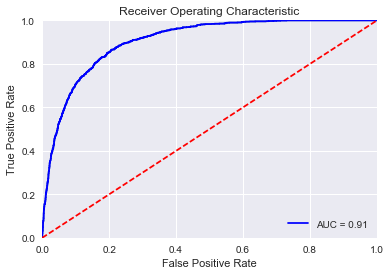

Accuracy : 0.848303018939
Recall : 0.848303018939
Precision : 0.842033799225
ROC_AUC : 0.905314270425
             precision    recall  f1-score   support

          0       0.87      0.93      0.90      3984
          1       0.75      0.60      0.67      1349

avg / total       0.84      0.85      0.84      5333

Confusion matrix, without normalization
[[3718  266]
 [ 543  806]]


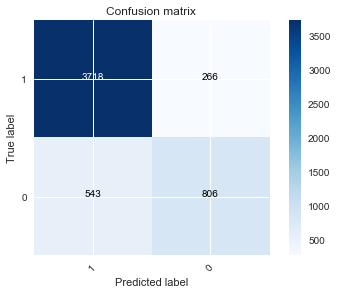

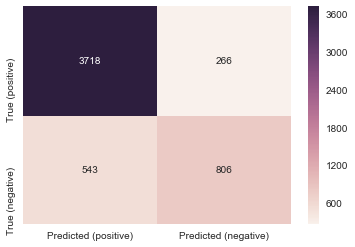

In [223]:
X = instacart_df.ix[:,['avg_reordered_items_per_order', 'avg_days_since_prior', 'mode_order_dow', 'mode_order_hour_of_day']]

y = instacart_df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

accuracy, recall, precision, metrics_df = logistic_regression(X_train,y_train,X_test,y_test)



 The model produced a negative intercept value and a weight of 0.52 on avg_reordered_items_per_order,
 -0.09 on avg_days_since_prior, -0.02 on mode_order_dow and 0. on mode_order_hour_of_day

**Logistic Regression with variables 'avg_reordered_items_per_order', 'avg_days_since_prior', 'mode_order_dow', 'mode_order_hour_of_day' and k fold cross validation**

In [88]:
accuracy, recall, precision = logistic_regression_cv(X, y, 15) 

Accuracy : 0.2159576962
Precision : 0.771091481707
Recall : 0.592656219264


**Learning curve for logistic regression**

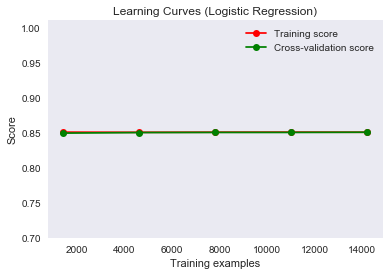

In [109]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=4444)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

** K Nearest Neighbors** 

In [97]:
#Try it with a lot of different k values (number of neighbors), from 1 to 20, 
#and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

accuracy = []
accuracy_index = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    accuracy_index.append(k)
    
print(accuracy)
print(accuracy_index)
max_accuracy = max(accuracy)
print(max_accuracy)
max_acc_k = accuracy.index(max_accuracy)+1  
print(max_acc_k)

[0.8151134445902869, 0.82542658916182265, 0.8385524095255954, 0.84324020251265708, 0.84830301893868365, 0.85055315957247324, 0.85299081192574533, 0.85467841740108752, 0.85449090568160513, 0.85767860491280701, 0.85617851115694732, 0.8589911869491843, 0.85767860491280701, 0.85992874554659671, 0.85617851115694732, 0.8606787924245265, 0.85917869866866681, 0.8588036752297018, 0.8616163510219389, 0.860866304144009]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
0.861616351022
19


Confusion matrix, without normalization
[[1237   91]
 [ 155  295]]


TypeError: 0 is not JSON serializable

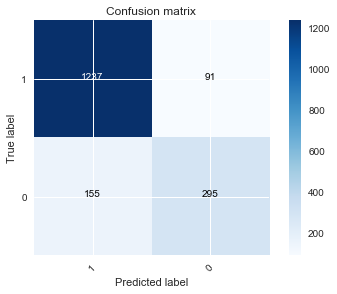

Accuracy : 0.861642294713
Recall : 0.861642294713
Precision : 0.857164428504
ROC_AUC : 0.793515729585


In [284]:
k=19
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
knn_19 = KNeighborsClassifier(n_neighbors=k)
knn_19.fit(X_train,y_train)
y_pred = knn_19.predict(X_test)

# Compute confusion matrix
    #class_names =[1,0] 
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix using matplotlib
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,0],
                      title='Confusion matrix')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                  title='Normalized confusion matrix')
plt.savefig('knn_conf_mat.png')  
plt.show()
#plt.savefig('knn_conf_mat.jpg')
    
    
accuracy = accuracy_score(y_test, y_pred)
#f1_score = f1_score(dep_var_test, y_pred,average='weighted')
recall =  recall_score(y_test, y_pred,average='weighted')
precision = precision_score(y_test, y_pred,average='weighted')

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
    
    
print("Accuracy :", accuracy)
print("Recall :", recall)
print("Precision :", precision)
print("ROC_AUC :", roc_auc)
    

**KNN - Accuracy as a function of k**

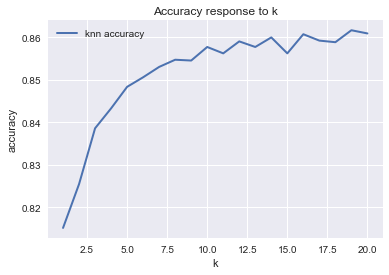

In [98]:
plot_response(accuracy_index,accuracy)

**Learning Curve for KNN where k is the one with maximum accuracy**

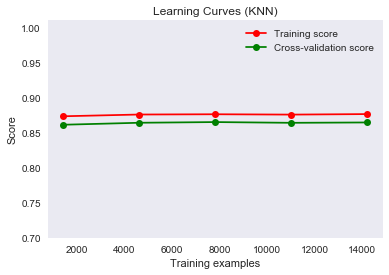

In [111]:
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1000)

estimator = KNeighborsClassifier(n_neighbors=19)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

**Gaussian Naive Bayes**

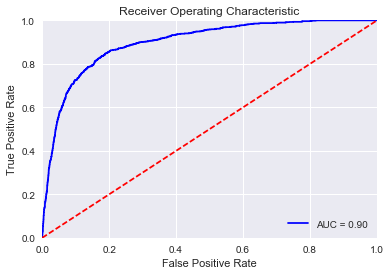

Accuracy : 0.854490905682
Recall : 0.854490905682
Precision : 0.849164185812
ROC_AUC : 0.897884439909


In [90]:
accuracy, recall, precision = gaussian_nb(X_train,y_train,X_test,y_test)

**Support Vector Machine**

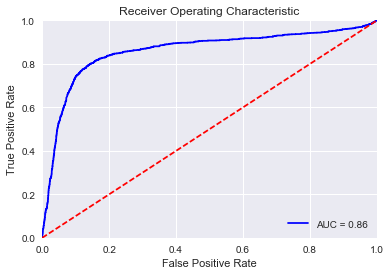

Accuracy : 0.857678604913
Recall : 0.857678604913
Precision : 0.854305531346
ROC_AUC : 0.858608916764


In [91]:
accuracy, recall, precision = support_vector_machine(X_train,y_train,X_test,y_test)

**Decision Tree**

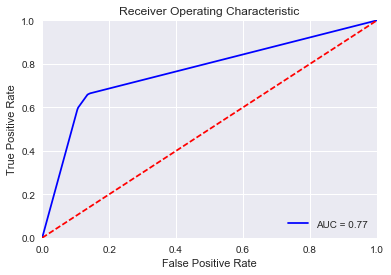

Accuracy : 0.818301143821
Recall : 0.818301143821
Precision : 0.813761851879
ROC_AUC : 0.768207559668


In [92]:
accuracy, recall, precision = decision_tree(X_train,y_train,X_test,y_test)

**Random Forest**

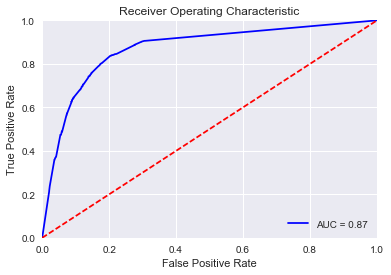

Accuracy : 0.840052503281
Recall : 0.840052503281
Precision : 0.83649864831
ROC_AUC : 0.869188391818


In [93]:
accuracy, recall, precision = random_forest(X_train,y_train,X_test,y_test)

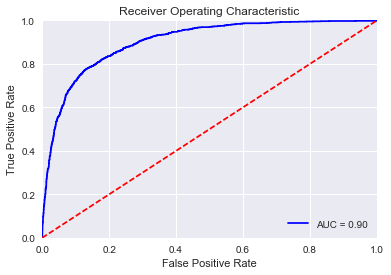

Accuracy : 0.858241140071
Recall : 0.858241140071
Precision : 0.855683687216
ROC_AUC : 0.901685224962


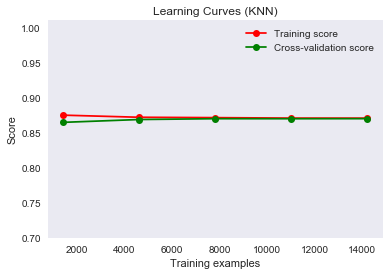

In [217]:
accuracy, recall, precision = logistic_regression_poly(X_train,y_train,X_test,y_test,degree=4)
plot_learning_curve(est, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

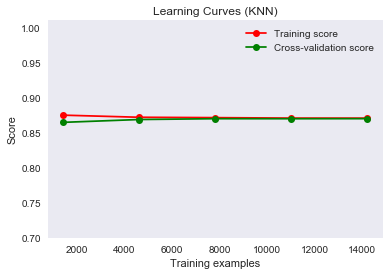

In [205]:

degree = 3
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LogisticRegression())
# Fit our model to the training data
est.fit(X_train, y_train)
est.score(X_test,y_test)

plot_learning_curve(est, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

**Hold-out set in practice: Classification**

Evaluating a model with tuned hyperparameters on a hold-out set. 

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set, and then evaluate its performance against the hold-out set.

In [94]:
cv = 5
logistic_regression_holdout(X_train,y_train,X_test,y_test,cv)

Tuned Logistic Regression Parameter: {'C': 0.43939705607607948, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.8526764185822215


**Comparison of models using cross validation**

In [ ]:
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

bestKValue = 19
models = {}
models = {'logres': LogisticRegression(), # Takes about 1 second elapsed time
          'knn with K=%d' % bestKValue : KNeighborsClassifier(n_neighbors=bestKValue), # Takes about 12 seconds elapsed time
          'gaussianNB': GaussianNB(),
          'random forest': RandomForestClassifier(),
          'decision tree': DecisionTreeClassifier(),
          'svm': svm.SVC(kernel='rbf',probability=True),
          'baseline' : DummyClassifier(strategy='stratified')
#          'randomforest with nrEst=%d and maxFeat=%d' % (bestNrEst,bestMaxFeat): RandomForestClassifier(n_estimators=bestNrEst, max_features=bestMaxFeat) # Takes about 5 seconds elapsed time
          }

scorerType = 'roc_auc'

nrCrossValidationFolds=10
# We MUST shuffle, because the data seem to be somehow ordered 
cvGenerator = KFold(len(X), n_folds=nrCrossValidationFolds, shuffle=True)  

fig = plt.figure(1,(9,6))
plt.title("%d-fold cross-validation %s scores for various model types" % (nrCrossValidationFolds, scorerType))
plt.xlabel("Fold #")
plt.ylabel(scorerType)
plt.grid()

for modelName, model in models.items():
#     print >> sys.stderr, "Building %s model ..." % modelName,
#     print >> sys.stderr, "applying it ...",
    scores = cross_val_score(model, X, y=y, scoring=scorerType, cv=cvGenerator, n_jobs=1, verbose=10)
#     print >> sys.stderr, "done"
    plt.plot(range(1,nrCrossValidationFolds+1), scores, 'o-', label="%s (%2.2f%% +/- %2.2f%%)" % (modelName, scores.mean() * 100, scores.std() * 100))
    
plt.legend(loc='best',fontsize = 'large')
plt.savefig('model_comp_kfolds.png')
plt.show()


[CV]  ................................................................
[CV] ................................. , score=0.488188, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.462065, total=   0.0s
[CV]  ................................................................
[CV] ................................. , score=0.497711, total=   0.0s
[CV]  ................................................................
[CV] ................................. , score=0.490544, total=   0.0s
[CV]  ................................................................
[CV] ................................. , score=0.482558, total=   0.0s
[CV]  ................................................................
[CV] ................................. , score=0.497324, total=   0.0s
[CV]  ................................................................
[CV] ................................. , score=0.498937, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV] ................................. , score=0.510450, total=   0.0s
[CV]  ................................................................
[CV] ................................. , score=0.485140, total=   0.0s
[CV]  ................................................................
[CV] ................................. , score=0.489978, total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


**ROC curves - Balancing true positives and false positives** 

In [3]:
import mpld3
mpld3.enable_notebook()

import re
from math import log
import json
import copy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

finalPredictions = {}

for modelName, model in models.items():
    fittedModel = model.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        #print >> sys.stderr, "Predicting probabilities for %s model ..." % modelName,
        finalPredictions[modelName] = {'train': model.predict_proba(X_train),
                                       'test': model.predict_proba(X_test)}
        #print >> sys.stderr, "done"
        
def plotROCCurve(figSize=7):
    # Define some CSS to control our custom labels
    css = """
table {
  border-collapse: collapse;
}
th {
  color: #ffffff;
  background-color: #000000;
}
td {
  padding: 2px;
  background-color: #cccccc;
}
table, th, td {
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""

    jsonROCData = {}        
    rocCurveFigure, ax = plt.subplots(figsize=(figSize,figSize))
    ax.grid(True, alpha=0.3)
    for modelName, probs in finalPredictions.items():
        modelNameShort = re.split("\s+", modelName)[0]
        y_probs = [x[1] for x in finalPredictions[modelName]['test']]
        fpr, tpr, thresholds = roc_curve(y_true=y_test, 
                                         y_score=y_probs, pos_label=1)

        roc_auc = roc_auc_score(y_true=y_test, y_score=y_probs)
        jsonROCData[modelNameShort] = {}
        jsonROCData[modelNameShort]['fpr'] = [x for x in fpr]
        jsonROCData[modelNameShort]['tpr'] = [ x for x in tpr]
        jsonROCData[modelNameShort]['thresholds'] = [np.asscalar(np.float32(x)) for x in thresholds]
        jsonROCData[modelNameShort]['roc_auc'] = roc_auc
        points = plt.plot(fpr, tpr, 'x-', label="%s (AUC = %1.2f%%)" % (modelName, roc_auc*100))
        labels = ["<table><th colspan='2'>%s</th><tr><td>FPR</td><td>%0.1f%%</td></tr><tr><td>TPR</td><td>%0.1f%%</td></tr><tr><td>threshold</td><td>%0.4f</td></tr></table>" % (modelNameShort, fpr[i]*100, tpr[i]*100, thresholds[i]) for i in range(len(fpr))]
        mpld3.plugins.connect(rocCurveFigure, mpld3.plugins.PointHTMLTooltip(points[0],labels=labels, css=css))
    ax.set_title("ROC curve for prediction of prime user", y=1.06, fontsize=14 + log(figSize))
    ax.set_xlabel("False Positive Rate (FP/FP+TN)", labelpad=15 + log(figSize), fontsize=12 + log(figSize))
    ax.set_ylabel("True Positive Rate (TP/TP+FN)", labelpad=15 + log(figSize), fontsize=12 + log(figSize))
    plt.legend(loc="best",fontsize = 'xx-large')
    plt.show()
    mpld3.save_html(rocCurveFigure,'ROC_comp')
    #plt.savefig('ROC_comp')
    rocCurveFigure.savefig('ROC_comp2')
    return jsonROCData

# Export data to JSON file for visualization in D3.js or similar
jsonROCData = plotROCCurve(figSize=9)
#print(jsonROCData)
#with open('d3/ROCCurve.json', 'w') as outfile:
with open('ROCCurve.json', 'w') as outfile:
    json.dump(jsonROCData, outfile)

#from IPython.html.widgets import interact, fixed
from ipywidgets import interact, interactive, fixed

interact(plotROCCurve, figSize=(5,10))


NameError: name 'X' is not defined